In [1]:
#import statements

#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#sklearn algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth', -1)

In [3]:
trainTest = pd.read_csv('trainTest.csv',low_memory = False)

In [4]:
train = trainTest[trainTest['dataType'] == 'train'].copy()
test = trainTest[trainTest['dataType'] == 'test'].copy()

In [5]:
train.status_group.head()

0    functional    
1    functional    
2    functional    
3    non functional
4    functional    
Name: status_group, dtype: object

In [6]:
#load label encoder
le = preprocessing.LabelEncoder()

In [7]:
#apply label encoder to train data
train = train.apply(le.fit_transform)

#apply label encoder to test data
#test = test.apply(le.fit_transform)

In [8]:
train.status_group.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

In [9]:
status_group_labels = {0:'functional',
                       1:'functional needs repair',
                       2:'nonfunctional'}

In [10]:
#create target variable for validation
target = train.status_group

#remove target variable from train
train = train.drop(['status_group','dataType'],axis =1)

In [ ]:
#consider setting random state to see if things get better?

In [11]:
#create training & test data for validation
xTrain, xTest, yTrain, yTest = train_test_split(train,target, test_size = .3)

#splits data set into 2 groups of 2 groups

#Group 1: train & test
#Group 2: x & y

#Group 1:
#train has 70% of the data according to test_size and test has the remaining 30%
#train is what you use to fit the model
#test is what you validate it on

#Group 2:
#x entire data frame to train the model 
#y the target variables for the model 

# xTrain inputs for determining yTrain to fit the model
# yTest inputs for trying to predict yTest to validate the model

In [12]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(41580, 36) (41580,)
(17820, 36) (17820,)


In [13]:
#import tree
clf_tree = tree.DecisionTreeClassifier()
clf_rnf = RandomForestClassifier()

In [14]:
#fit model
model_tree = clf_tree.fit(xTrain,yTrain)
model_rnf = clf_rnf.fit(xTrain,yTrain)

In [15]:
#make predictions
predictions_tree = model_tree.predict(xTest)
predictions_rnf = model_rnf.predict(xTest)

In [16]:
#contains a list of predictions for the model
print(predictions_tree[0:30])
print(predictions_rnf[0:30])

[2 2 0 1 0 0 2 0 0 0 2 0 2 0 0 0 1 0 2 0 2 0 0 0 0 2 2 0 0 0]
[2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 1 1 0 2 2 2 0 0 0 2 2 2 2 0 0]


In [17]:
model_dif = (predictions_tree == predictions_rnf)

In [18]:
model_dif.tolist().count(False)
#number of instances where rnf disagrees with decision tree

2733

In [19]:
model_dif.tolist().count(False)/len(model_dif)
#a little more than 14% of the data

0.15336700336700337

In [20]:
#accuracy score import
from sklearn.metrics import accuracy_score

#print(tree_model.score(xTest,yTest))
#for the tree model, here is how well you predict yTest, given inputs of xTest

#print(accuracy_score(yTest,predictions))
#here is how the actual values of yTest compare with your predictions

In [21]:
print(accuracy_score(yTest,predictions_tree))
print(accuracy_score(yTest,predictions_rnf))
#find that Random Forest is more accurate
#also seems that rnf changes a little bit

0.751795735129
0.790909090909


In [22]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [23]:
#confusion matrix
#diagonals are correct predictions
#off diagonals are false positives/false negatives

cm = confusion_matrix(yTest,predictions_rnf)
print(cm)

[[8407  342  883]
 [ 683  454  188]
 [1488  142 5233]]


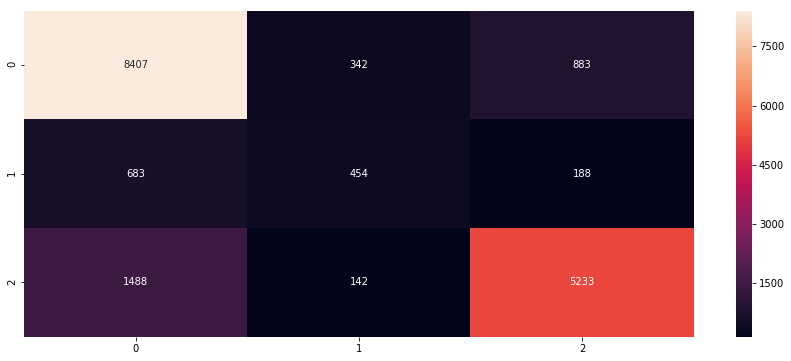

In [24]:
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(cm, annot=True, fmt='g')
#lighter the color, the more right it is
#biggest problem: incorrect classification of functional(0) as nonfunctional(2)
#2nd biggest: incorrect nonfunctional(2) as functional(0)
#3rd problems classification of functional needs repair 

In [25]:
status_group_labels

{0: 'functional', 1: 'functional needs repair', 2: 'nonfunctional'}

In [26]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
#https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-4

In [28]:
#look at this to try and explore kfolds tutorial
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [47]:
#need to split it out ahead of time
folds = 10

X_folds = np.array_split(train, folds) #inputs
y_folds = np.array_split(target, folds) #outputs
scores = list()

for k in range(folds):
     # We use 'list' to copy, in order to 'pop' later on
        #pop returns the element present at the given index
        #but removes the element at the given index and updates the list
        
        #in other words, pop simuletanously
        #creates the test data by returning the index
        #updates the train data by removing the test from it
     X_train = list(X_folds)
     X_test  = X_train.pop(k) 
     X_train = np.concatenate(X_train) #joins the 2 train arrays into a single array
     y_train = list(y_folds)
     y_test  = y_train.pop(k)
     y_train = np.concatenate(y_train)
     scores.append(clf_rnf.fit(X_train, y_train).score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.80134680134680136, 0.80353535353535355, 0.79713804713804715, 0.79074074074074074, 0.81178451178451183, 0.79360269360269364, 0.80959595959595965, 0.79090909090909089, 0.79074074074074074, 0.80000000000000004]
0.798939393939


In [48]:
#this does the same thing as above, but in less code (I think)

#http://scikit-learn.org/stable/modules/cross_validation.html
clf_rnf = RandomForestClassifier()
scores = cross_val_score(clf_rnf, train, target, cv =10)
print(scores) #gives each of the scores
print(scores.mean()) #averages everything out

#does am I fitting the model during this step?  Or just seeing if it is working?

[ 0.80306346  0.80525164  0.79599394  0.7926275   0.80740741  0.79141414
  0.8043771   0.78582253  0.78986361  0.80010104]
0.797592238244


In [50]:
#so functionally the same
v1 = 0.798939393939
v2 = 0.797592238244
print((v1-v2)/v1)


0.001686180084772297


In [ ]:
#so how does this work
#my understanding

#fit/trained the rnf 10 different times, but they are independent and didn't affect one another
#now need to average the results - is this a straight average?  Or does something else happen?

In [30]:
#Cross Validation Imports
from sklearn.model_selection import KFold, cross_val_score

In [51]:
from sklearn.model_selection import cross_val_predict

In [52]:
predictions2 = cross_val_predict(clf_rnf,train,target,cv=10)

In [53]:
from sklearn import metrics
metrics.accuracy_score(target, predictions2)

0.79868686868686867

In [35]:
#example 2 splitting the data using k_fold split?  
X = train
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X): #Generate indices to split data into training and test set
      print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [19800 19801 19802 ..., 59397 59398 59399] | test: [    0     1     2 ..., 19797 19798 19799]
Train: [    0     1     2 ..., 59397 59398 59399] | test: [19800 19801 19802 ..., 39597 39598 39599]
Train: [    0     1     2 ..., 39597 39598 39599] | test: [39600 39601 39602 ..., 59397 59398 59399]
